In [1]:
import numpy as np
import pandas as pd
from numpy import loadtxt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import skfuzzy as fuzz
from sklearn.cluster import KMeans
import mahalanobisDist as md
global str
import seaborn as sn
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
hd = np.array(loadtxt("humidity-l.txt", comments="#", delimiter=",", unpack=False))
ph = np.array(loadtxt("peek_hour-l.txt", comments="#", delimiter=",", unpack=False))
rf = np.array(loadtxt("rainfall-l.txt", comments="#", delimiter=",", unpack=False))
tp = np.array(loadtxt("temp-l.txt", comments="#", delimiter=",", unpack=False))
wd = np.array(loadtxt("wind-l.txt", comments="#", delimiter=",", unpack=False))
alldata = np.vstack((hd, ph, rf, tp, wd))

In [3]:
clean_data, outliers, cl_idx, ol_idx = md.removeOutliers(alldata)
cldays_id = np.array([])
_ = 'Day#'
for i in range (len(cl_idx)):
    cldays_id = np.append(cldays_id, _ + str(int(cl_idx[i])))
print (clean_data.shape)
print (alldata.shape)

(682, 5)
(5, 750)


In [4]:
cleandata_df = pd.DataFrame(clean_data, index=cldays_id)
#cleandata_df.columns = ['daysID','humidity', 'peek-hour', 'rainfall', 'temp', 'wind']
cleandata_df = cleandata_df.rename(columns = {0:'humidity'})
cleandata_df = cleandata_df.rename(columns = {1:'peek_hour'})
cleandata_df = cleandata_df.rename(columns = {2:'rainfall'})
cleandata_df = cleandata_df.rename(columns = {3:'temp'})
cleandata_df = cleandata_df.rename(columns = {4:'wind'})

cleandata_df.index.names = ['Day']
cleandata_df.columns.names = ['(weather feature)']
print (cleandata_df.head())

(weather feature)  humidity  peek_hour  rainfall  temp  wind
Day                                                         
Day#1                  54.0       15.0       0.0  20.0   2.0
Day#2                  55.0       35.0       0.0  20.0   1.0
Day#3                  62.0       10.0       0.0  18.0   3.0
Day#4                  62.0       75.0       0.0  20.0   3.0
Day#5                  64.0       20.0       0.0  20.0   0.0


In [5]:
days_id = np.array([])
_ = 'Day#'
for i in range (len(alldata[0])):
    days_id = np.append(days_id, _ + str(int(i+1)))
#print (days_id.shape)
data_df = pd.DataFrame(alldata.T, index=days_id)
#data_df.columns = ['daysID','humidity', 'peek-hour', 'rainfall', 'temp', 'wind']
data_df = data_df.rename(columns = {0:'humidity'})
data_df = data_df.rename(columns = {1:'peek_hour'})
data_df = data_df.rename(columns = {2:'rainfall'})
data_df = data_df.rename(columns = {3:'temp'})
data_df = data_df.rename(columns = {4:'wind'})

data_df.index.names = ['Day']
data_df.columns.names = ['(weather feature)']
print (data_df.head())

(weather feature)  humidity  peek_hour  rainfall  temp  wind
Day                                                         
Day#1                  54.0       15.0       0.0  20.0   2.0
Day#2                  55.0       35.0       0.0  20.0   1.0
Day#3                  62.0       10.0       0.0  18.0   3.0
Day#4                  62.0       75.0       0.0  20.0   3.0
Day#5                  64.0       20.0       0.0  20.0   0.0


In [7]:
print (data_df.columns)
X = cleandata_df[['humidity', 'peek_hour', 'rainfall', 'temp', 'wind']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
print (X_scaled.shape)

Index(['humidity', 'peek_hour', 'rainfall', 'temp', 'wind'], dtype='object', name='(weather feature)')
(682, 5)


cluster_labels :
(682,)
For n_clusters = 2 The average silhouette_score is : 0.215854983428


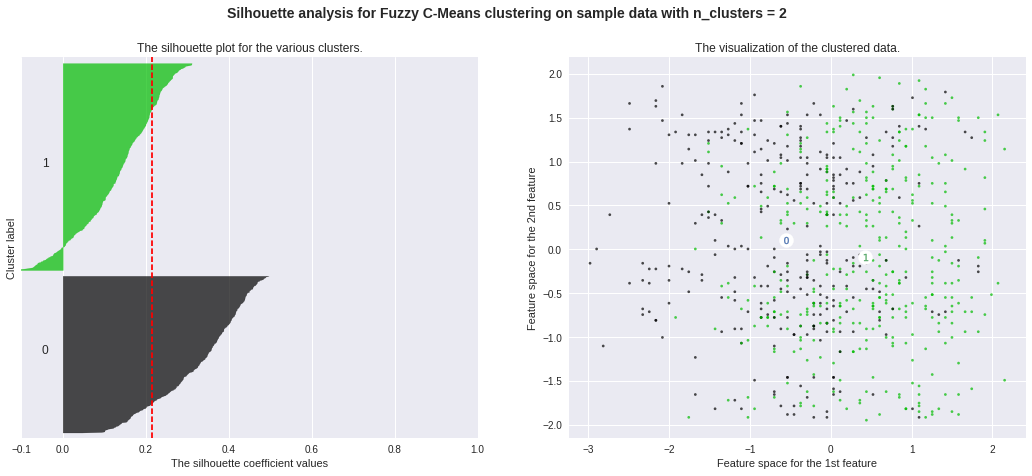

cluster_labels :
(682,)
For n_clusters = 3 The average silhouette_score is : 0.220676402134


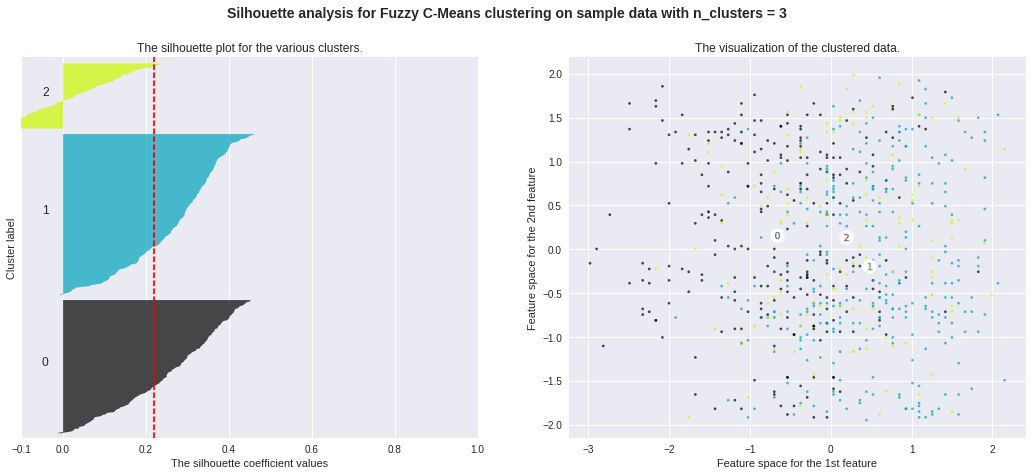

cluster_labels :
(682,)
For n_clusters = 4 The average silhouette_score is : 0.241359415124


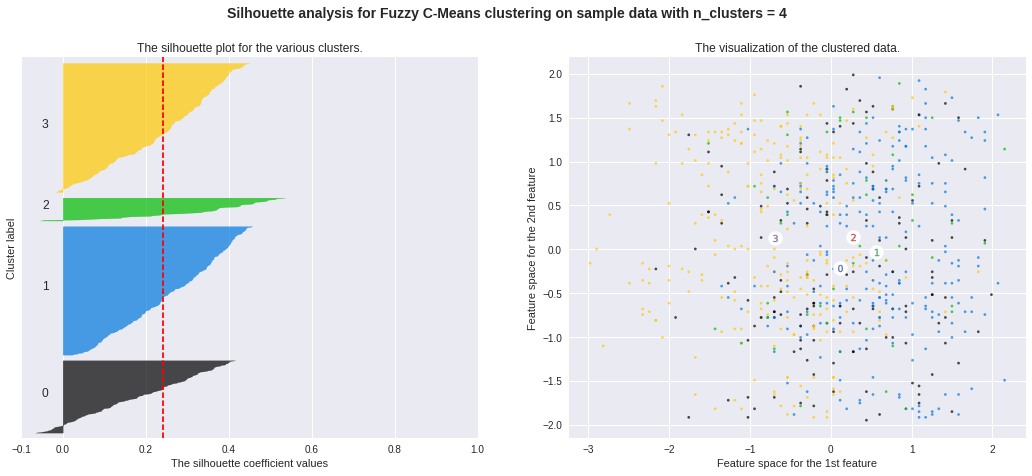

cluster_labels :
(682,)
For n_clusters = 5 The average silhouette_score is : 0.231872119025


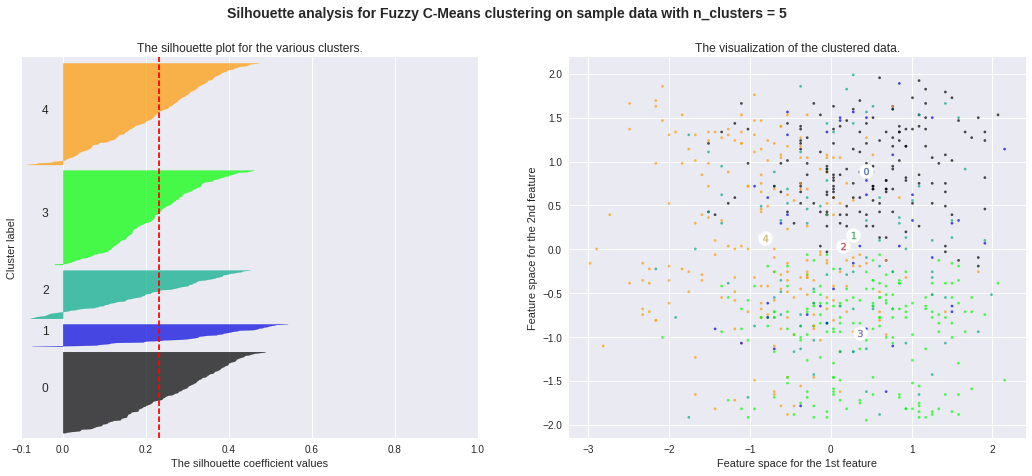

cluster_labels :
(682,)
For n_clusters = 6 The average silhouette_score is : 0.234085876374


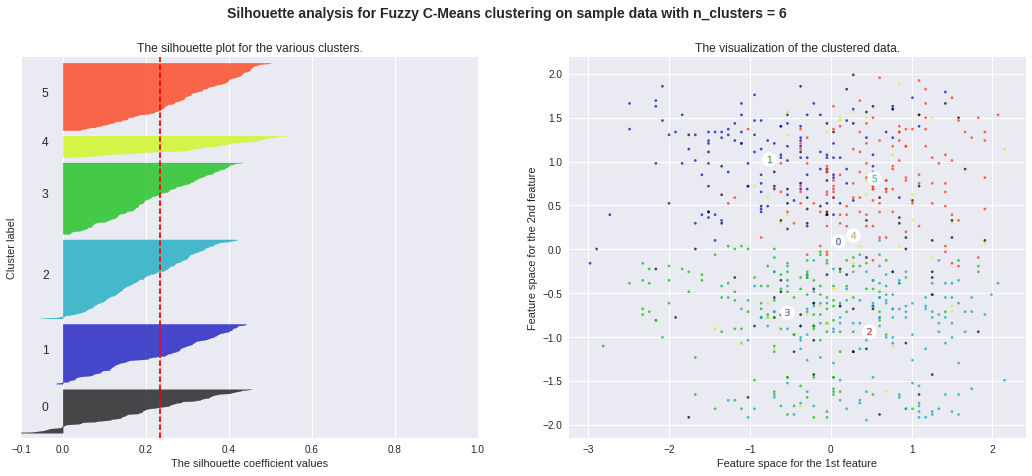

cluster_labels :
(682,)
For n_clusters = 7 The average silhouette_score is : 0.243506114169


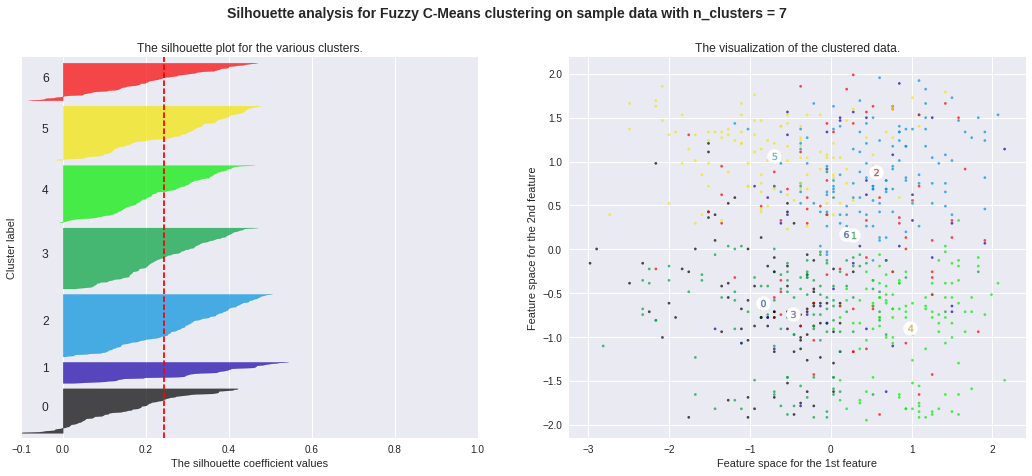

cluster_labels :
(682,)
For n_clusters = 8 The average silhouette_score is : 0.235671854875


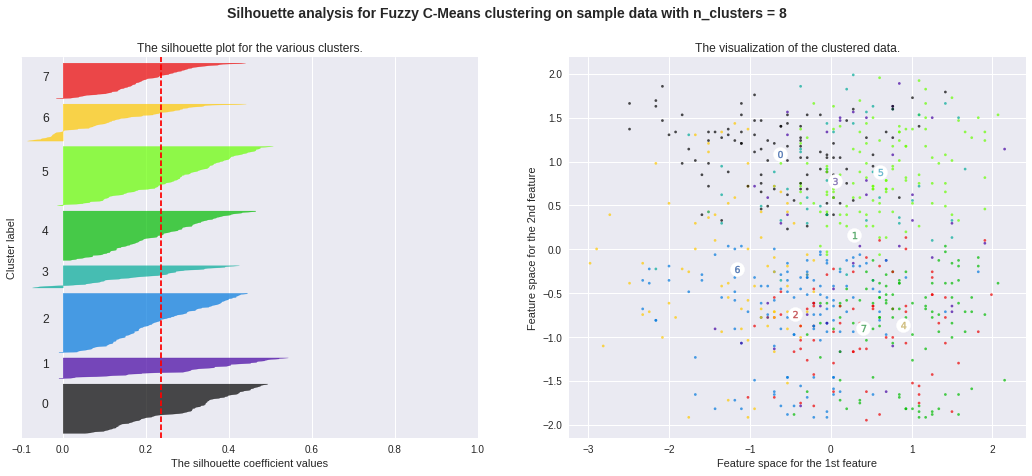

cluster_labels :
(682,)
For n_clusters = 9 The average silhouette_score is : 0.228884748596


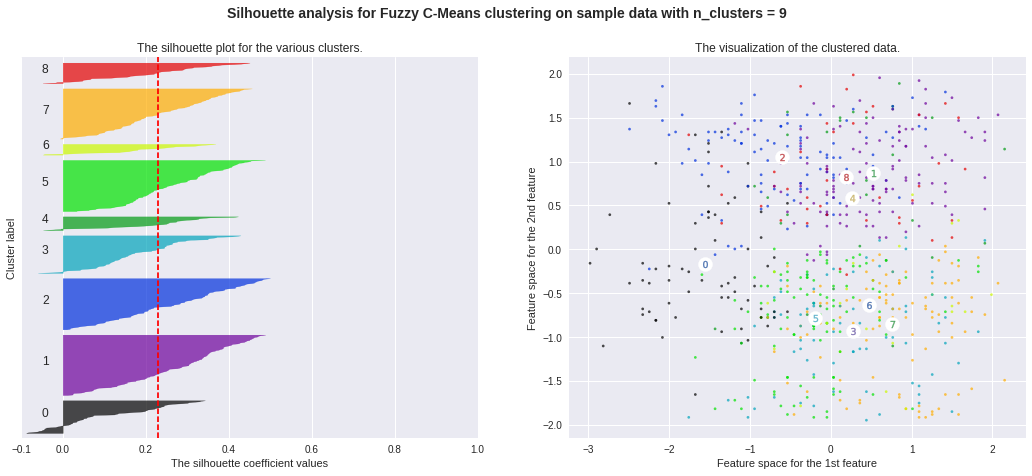

c_sil_score
[ 0.21585498  0.2206764   0.24135942  0.23187212  0.23408588  0.24350611
  0.23567185  0.22888475]


In [8]:
cluster_range = range( 2, 10 )
c_sil_score = np.array([])
for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X_scaled.T, n_clusters, 1.1, error=0.0005, maxiter=1500, init=None)
  cluster_labels = np.argmax(u, axis=0)

  #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  #cluster_labels = clusterer.fit_predict( X_scaled )
  print ('cluster_labels :')
  print (cluster_labels.shape)
  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)
  c_sil_score = np.append(c_sil_score, silhouette_avg)
  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = cntr
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for Fuzzy C-Means clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()
print ('c_sil_score')
print (c_sil_score)

In [9]:
import numpy as np
k_sil_score = np.array([0.21795219, 0.24224329, 0.2562878, 0.23723075, 0.23383492, 0.24152081,
  0.24651459, 0.23626536])

dunn_in_manhattan_R = np.array([0.013636364 ,0.019512195 ,0.009478673 ,0.014218009, 
                        0.014218009 ,0.022988506 ,0.014218009 ,.013917526])

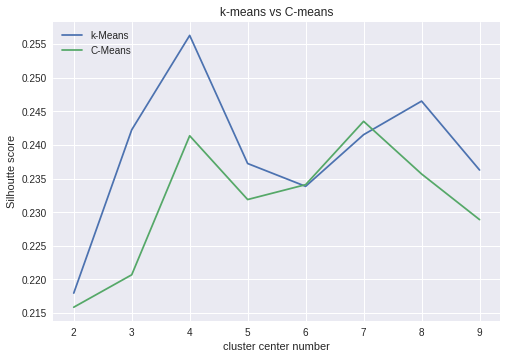

In [10]:
xpts = range( 2, 10 )
plt.plot(xpts, k_sil_score)
plt.plot(xpts, c_sil_score)
plt.legend(['k-Means', 'C-Means'], loc='upper left')
plt.title('k-means vs C-means')
plt.xlabel('cluster center number')
plt.ylabel('Silhoutte score')
plt.show()


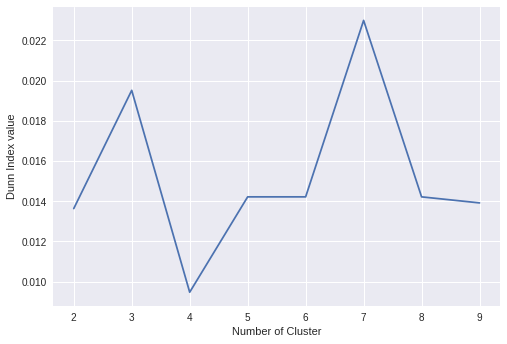

In [11]:
xpts = range( 2, 10 )
plt.plot(xpts, dunn_in_manhattan_R)
plt.xlabel('Number of Cluster')
plt.ylabel('Dunn Index value')